#                 ........................Import Library Files.................................

In [279]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from pandas import DataFrame
from pandas.api.types import infer_dtype
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [280]:
df= pd.read_csv("D:\Academic\Research\ML Data Collection\miscCSV\ch_mental_health.csv")
df.columns

Index(['UB2', 'EC1', 'EC2A', 'EC2B', 'EC2C', 'EC3A', 'EC3B', 'EC5AA', 'EC5AB',
       'EC5AX', 'EC5AY', 'EC5ANR', 'EC5BA', 'EC5BB', 'EC5BX', 'EC5BY',
       'EC5BNR', 'EC5CA', 'EC5CB', 'EC5CX', 'EC5CY', 'EC5CNR', 'EC5DA',
       'EC5DB', 'EC5DX', 'EC5DY', 'EC5DNR', 'EC5EA', 'EC5EB', 'EC5EX', 'EC5EY',
       'EC5ENR', 'EC11', 'EC12', 'EC13', 'EC14', 'EC15', 'UCD2A', 'UCD2B',
       'UCD2C', 'UCD2D', 'UCD2E', 'UCD2F', 'UCD2G', 'UCD2H', 'UCD2I', 'UCD2J',
       'UCD2K', 'UCD3', 'UCD5', 'UCF15', 'UCF16', 'UCF17', 'UCF18', 'UCF19',
       'BD2', 'AN4', 'AN8', 'HH6', 'HH7', 'HL4', 'windex5', 'melevel',
       'cdisability'],
      dtype='object')

In [281]:
#df=df.drop(['Unnamed: 0'], axis=1)
#df=df.drop(['lbw'], axis=1)

In [282]:
df=df[['UB2', 'UCD2A', 'UCD2B','UCD2C', 'UCD2D', 'UCD2E', 'UCD2F', 'UCD2G', 'UCD2H', 'UCD2I', 'UCD2J','UCD2K','UCF17','BD2', 'AN4', 'AN8', 'HH6', 'HH7', 'HL4', 'windex5', 'melevel']]

In [283]:
df.shape

(24686, 21)

# .......................Null/Missing value fillup.................

In [284]:
df.isnull().sum().sum()

93646

In [285]:
percent_missing = (df['UCF17'].isnull().sum() * 100 / len(df['UCF17']))
percent_missing

43.05274244511059

In [286]:
# percent of data that is missing per column
percent_missing = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
percent_missing[0:10]

BD2      44.721705
UCF17    43.052742
UCD2J    24.754922
UCD2B    24.754922
UCD2C    24.754922
UCD2D    24.754922
UCD2E    24.754922
UCD2F    24.754922
UCD2G    24.754922
UCD2H    24.754922
dtype: float64

In [287]:
df1 = df.loc[df['UCF17'].notnull()] 
df1.shape

(14058, 21)

In [288]:
# percent of data that is missing per column
count=0
for col in df1.columns:
    print(col)
    print(df1[col].unique())


UB2
[4. 3. 2.]
UCD2A
['NO' 'YES' 'NO RESPONSE']
UCD2B
['NO' 'YES' 'NO RESPONSE']
UCD2C
['NO' 'YES' 'NO RESPONSE']
UCD2D
['YES' 'NO' 'NO RESPONSE']
UCD2E
['NO' 'YES' 'NO RESPONSE']
UCD2F
['NO' 'YES' 'NO RESPONSE']
UCD2G
['NO' 'YES' 'NO RESPONSE']
UCD2H
['YES' 'NO']
UCD2I
['NO' 'YES' 'NO RESPONSE']
UCD2J
['NO' 'YES']
UCD2K
['NO' 'YES' 'NO RESPONSE']
UCF17
['NO DIFFICULTY' 'SOME DIFFICULTY' 'A LOT OF DIFFICULTY'
 'CANNOT LEARN THINGS AT ALL' 'NO RESPONSE']
BD2
[nan 'YES' 'NO' 'DK']
AN4
[4. 3. 2.]
AN8
[16.3  9.8 14.7 13.  11.7 12.3 15.1 15.9 14.8 11.6 15.7 14.2 15.3 10.3
 10.  11.9 11.2 11.4 13.1 13.2 13.8  9.6 16.5 10.6 10.8 15.2  9.9 12.1
 12.9 13.6 13.4 11.  16.2  9.3 10.4 11.3 14.4 11.8 14.  18.4  8.9  9.2
 12.4 12.6 11.5 14.3 12.  15.8 12.5 12.7 13.7 11.1 16.6 10.7 10.9  8.2
 99.6 17.6 14.6 16.8  9.1 10.5  9.4  9.7 13.3 15.6 15.  12.2 14.1 20.3
 12.8 17.3 16.  14.9  7.  19.8 23.5 99.3 18.5  7.4 17.2 16.1 16.4 17.1
 15.4 13.5  8.6 22.6 13.9 17.7  8.  10.1 10.2  8.8  8.3 16.7 19.  16.9


In [289]:
for col in df1.columns:
    df1 = df1.loc[(df1[col]!='DK')&(df1[col]!='NO RESPONSE')] 
df1.shape

(14026, 21)

In [290]:
# percent of data that is missing per column
count=0
for col in df1.columns:
    print(col)
    print(df1[col].unique())


UB2
[4. 3. 2.]
UCD2A
['NO' 'YES']
UCD2B
['NO' 'YES']
UCD2C
['NO' 'YES']
UCD2D
['YES' 'NO']
UCD2E
['NO' 'YES']
UCD2F
['NO' 'YES']
UCD2G
['NO' 'YES']
UCD2H
['YES' 'NO']
UCD2I
['NO' 'YES']
UCD2J
['NO' 'YES']
UCD2K
['NO' 'YES']
UCF17
['NO DIFFICULTY' 'SOME DIFFICULTY' 'A LOT OF DIFFICULTY'
 'CANNOT LEARN THINGS AT ALL']
BD2
[nan 'YES' 'NO']
AN4
[4. 3. 2.]
AN8
[16.3  9.8 14.7 13.  11.7 12.3 15.1 15.9 14.8 11.6 15.7 14.2 15.3 10.3
 10.  11.9 11.2 11.4 13.1 13.2 13.8  9.6 16.5 10.6 10.8 15.2  9.9 12.1
 12.9 13.6 13.4 11.  16.2  9.3 10.4 11.3 14.4 11.8 14.  18.4  8.9  9.2
 12.4 12.6 11.5 14.3 12.  15.8 12.5 12.7 13.7 11.1 16.6 10.7 10.9  8.2
 99.6 17.6 14.6 16.8  9.1 10.5  9.4  9.7 13.3 15.6 15.  12.2 14.1 20.3
 12.8 17.3 16.  14.9  7.  19.8 23.5 99.3 18.5  7.4 17.2 16.1 16.4 17.1
 15.4 13.5  8.6 22.6 13.9 17.7  8.  10.1 10.2  8.8  8.3 16.7 19.  16.9
  6.4  6.2  6.9  8.1 18.3 14.5  7.9 18.1 17.4  8.7  9.5 99.4  7.6 18.
 18.2 17.5 31.7 15.5  8.4 19.4 17.  19.7 18.8 19.2  9.  17.8 19.1 20.1
  8.

In [291]:
# percent of data that is missing per column
percent_missing = (df1.isnull().sum() * 100 / len(df1)).sort_values(ascending=False)
percent_missing[0:10]

BD2        67.28932
UB2         0.00000
UCD2K       0.00000
windex5     0.00000
HL4         0.00000
HH7         0.00000
HH6         0.00000
AN8         0.00000
AN4         0.00000
UCF17       0.00000
dtype: float64

In [292]:
# Below code gives percentage of null in every column
null_percentage = df1.isnull().sum()/df1.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>94].keys()

df2 = df1.drop(col_to_drop, axis=1)
df2.shape

(14026, 21)

In [293]:
col_to_drop

Index([], dtype='object')

In [294]:
for col in df2.columns:
    if len(df2[col].unique()) == 1:
        print(col)
        df2.drop(col,inplace=True,axis=1)
df2.shape

(14026, 21)

In [295]:
for column in df2.columns:
    print(column,':',infer_dtype(df2[column]))

UB2 : floating
UCD2A : string
UCD2B : string
UCD2C : string
UCD2D : string
UCD2E : string
UCD2F : string
UCD2G : string
UCD2H : string
UCD2I : string
UCD2J : string
UCD2K : string
UCF17 : string
BD2 : string
AN4 : floating
AN8 : floating
HH6 : string
HH7 : string
HL4 : string
windex5 : string
melevel : string


In [296]:
#percent of value missing in target MN34
percent_missing = (df2['UCF17'].isnull().sum() * 100 / len(df2['UCF17']))
percent_missing

0.0

In [297]:
numeric_features = df2.select_dtypes(include=[np.number])
categorical_features = df2.select_dtypes(exclude=[np.number])
df3=df2.copy()

In [298]:
for column in categorical_features.columns:
    df3[column].fillna(df3[column].mode()[0], inplace=True)
    
for column in numeric_features.columns:
    df3[column].fillna(df3[column].mean(), inplace=True)

In [299]:
df3.isnull().sum().sum()

0

# .........................Duplicate Value Remove.....................................

In [300]:
df3.duplicated()

0        False
2        False
3        False
4        False
5        False
         ...  
24676    False
24678    False
24679    False
24683    False
24685    False
Length: 14026, dtype: bool

In [301]:
df3.loc[df3.duplicated(), :].shape

(44, 21)

In [302]:
df4 = df3.drop_duplicates()
df4.loc[df4.duplicated(), :]

,UB2,UCD2A,UCD2B,UCD2C,UCD2D,UCD2E,UCD2F,UCD2G,UCD2H,UCD2I,...,UCD2K,UCF17,BD2,AN4,AN8,HH6,HH7,HL4,windex5,melevel


In [303]:
df4.shape

(13982, 21)

In [304]:
df4['UCF17'].unique()

array(['NO DIFFICULTY', 'SOME DIFFICULTY', 'A LOT OF DIFFICULTY',
       'CANNOT LEARN THINGS AT ALL'], dtype=object)

In [305]:
for column in df4.columns:
    if(infer_dtype(df4[column])=="mixed"):
        print(column,':',infer_dtype(df4[column]))
        df4[column]=pd.to_numeric(df4[column],errors='coerce')
        df4[column] = df4[column].apply(lambda elt: str(int(elt)) if isinstance(elt, float) else str(elt))

In [306]:
#df4['MA2'] = df4['MA2'].astype(float)

In [307]:
#df4['MN5'] = df4['MN5'].astype(int)

In [308]:
for column in df4.columns:
    print(column,':',infer_dtype(df4[column]))

UB2 : floating
UCD2A : string
UCD2B : string
UCD2C : string
UCD2D : string
UCD2E : string
UCD2F : string
UCD2G : string
UCD2H : string
UCD2I : string
UCD2J : string
UCD2K : string
UCF17 : string
BD2 : string
AN4 : floating
AN8 : floating
HH6 : string
HH7 : string
HL4 : string
windex5 : string
melevel : string


# .........................Outlier Remove...............................

In [309]:
import scipy.stats as stats

### Z-score Treatment

In [310]:
numeric_features = df4.select_dtypes(include=[np.number])

In [311]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(numeric_features))
#only keep rows in dataframe with all z-scores less than absolute value of 3 
df_out_remove = numeric_features[(z<3).all(axis=1)]
#find how many rows are left in the dataframe 
df_out_remove.shape

(13524, 3)

### Interquartile Treatment

In [312]:
#find Q1, Q3, and interquartile range for each column
Q1 = numeric_features.quantile(q=.25)
Q3 = numeric_features.quantile(q=.75)
IQR = numeric_features.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = numeric_features[~((numeric_features < (Q1-1.5*IQR)) | (numeric_features > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.columns

Index(['UB2', 'AN4', 'AN8'], dtype='object')

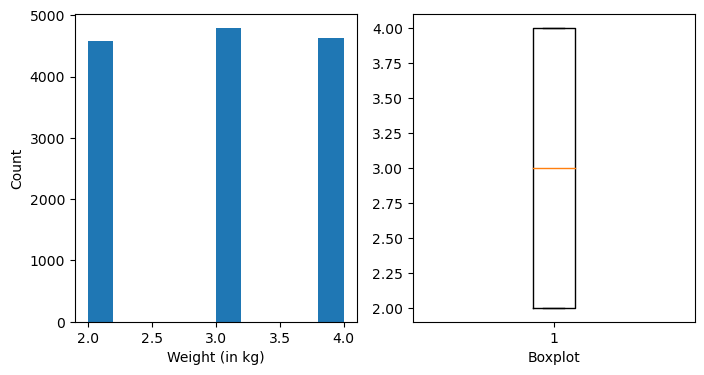

In [313]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.hist(df4['UB2']) 
plt.xlabel('Weight (in kg)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(df4['UB2']) 
#df4.MN34.plot(kind='box', subplots=True, layout=(20,3), sharex=False, sharey=False,  figsize=(20, 40))
plt.xlabel('Boxplot')

plt.show()

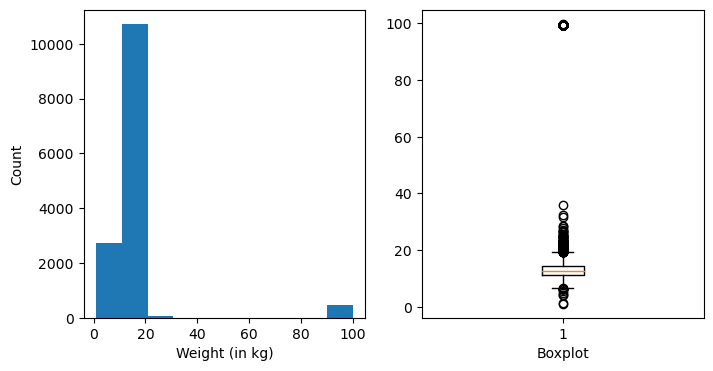

In [314]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.hist(df4['AN8']) 
plt.xlabel('Weight (in kg)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(df4['AN8']) 
#df4.MN34.plot(kind='box', subplots=True, layout=(20,3), sharex=False, sharey=False,  figsize=(20, 40))
plt.xlabel('Boxplot')

plt.show()

<Axes: xlabel='AN8', ylabel='Density'>

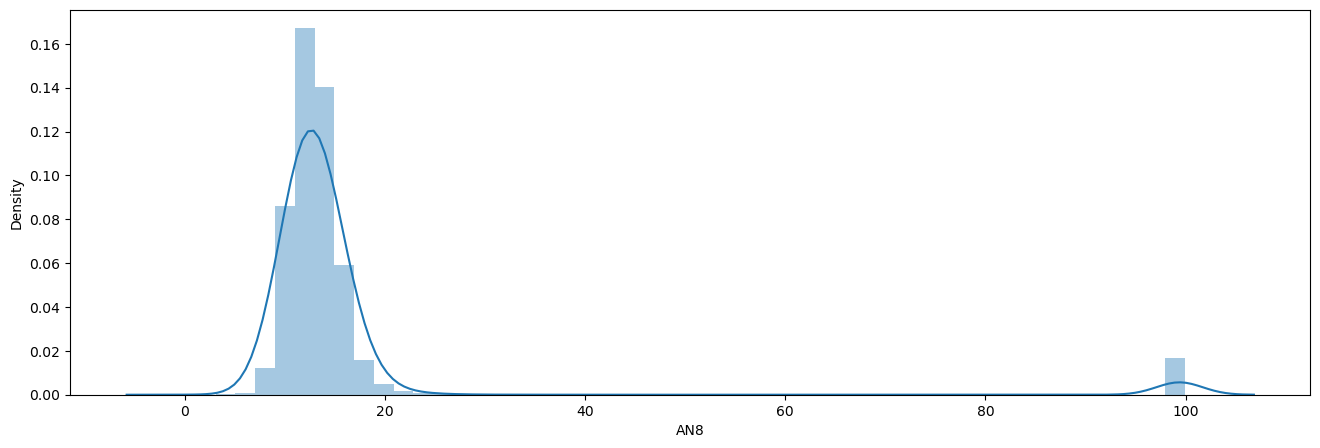

In [315]:
plt.figure(figsize=(16,5))
#plt.subplot(1,2,1)
sns.distplot(numeric_features['AN8'])
#plt.subplot(1,2,2)
#sns.distplot(numeric_features['CDEAD'])
#plt.show()

In [316]:
upper_limit=df4['AN8'].mean() + 3*df4['AN8'].std()
lower_limit=df4['AN8'].mean() - 3*df4['AN8'].std()
print("Highest allowed", upper_limit)
print("Lowest allowed", lower_limit)

Highest allowed 62.44490735907841
Lowest allowed -30.977320461638847


In [317]:
df4.shape

(13982, 21)

In [318]:
df4_outlier_del = df4[(df4['AN8'] < upper_limit) & (df4['AN8'] > lower_limit)]

In [319]:
df4_outlier_del.shape

(13524, 21)

<Axes: xlabel='AN8', ylabel='Density'>

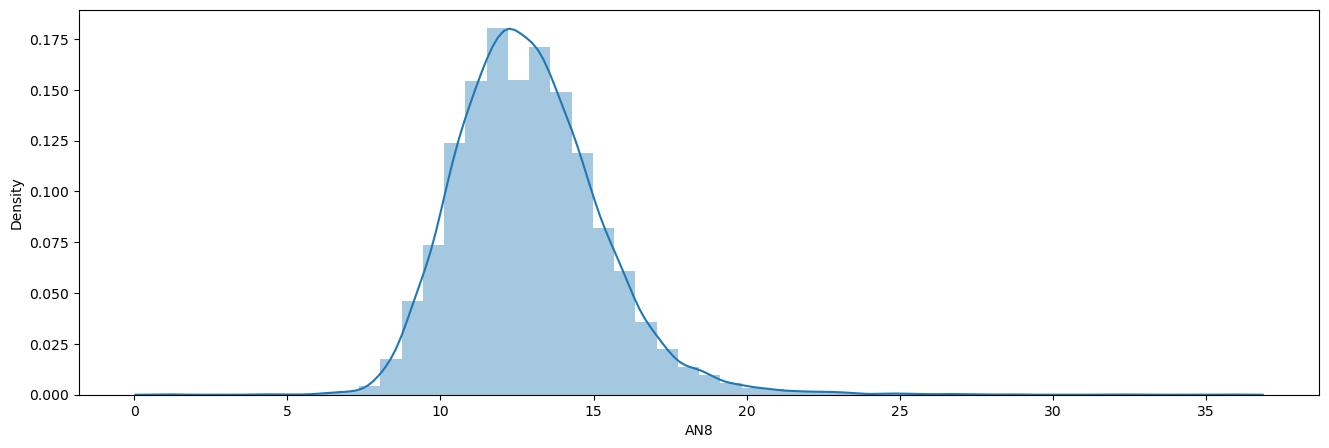

In [320]:
plt.figure(figsize=(16,5))
sns.distplot(df4_outlier_del['AN8'])

<Axes: xlabel='UB2', ylabel='Density'>

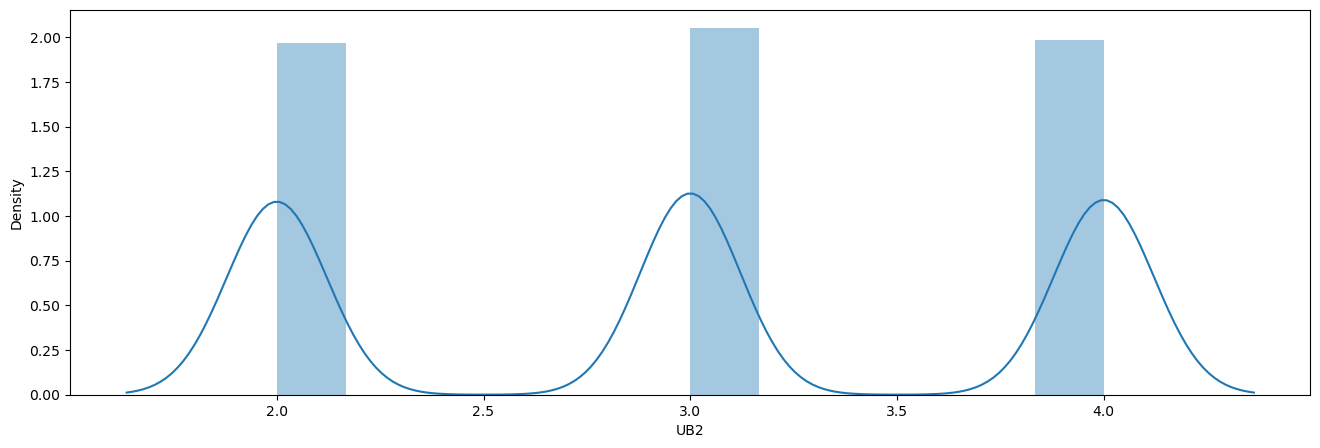

In [321]:
plt.figure(figsize=(16,5))
sns.distplot(df4_outlier_del['UB2'])

<Axes: xlabel='AN4', ylabel='Density'>

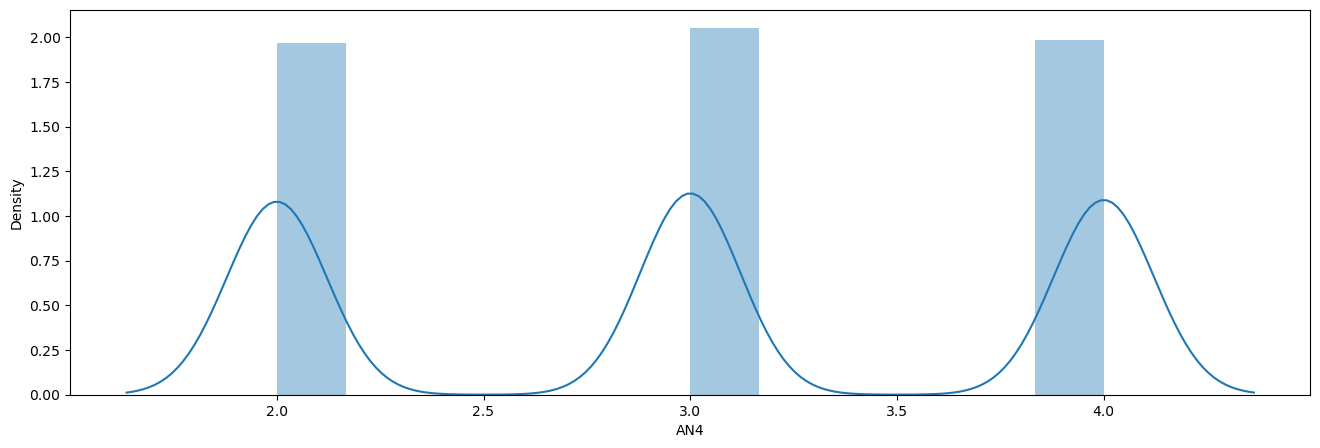

In [322]:
plt.figure(figsize=(16,5))
sns.distplot(df4_outlier_del['AN4'])

In [323]:
df4_outlier_del.shape

(13524, 21)

In [324]:
df4_outlier_del.isnull().sum().sum()

0

In [325]:
df4_outlier_del = df4_outlier_del.dropna(axis=0)
df4_outlier_del.shape

(13524, 21)

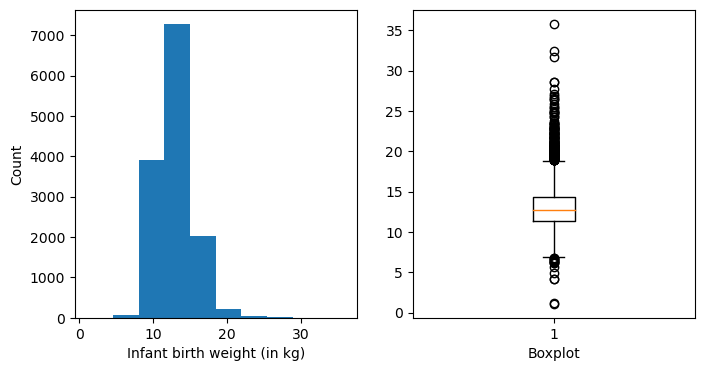

In [326]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.hist(df4_outlier_del['AN8']) 
plt.xlabel('Infant birth weight (in kg)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(df4_outlier_del['AN8']) 
#df4.MN34.plot(kind='box', subplots=True, layout=(20,3), sharex=False, sharey=False,  figsize=(20, 40))
plt.xlabel('Boxplot')

plt.show()

In [327]:
df4_outlier_del.isnull().sum().sum()

0

# Binning

In [328]:
scale_mapper = {'NO DIFFICULTY':'NO DIFFICULTY', 'SOME DIFFICULTY':'HAVE DIFFICULTY', 'A LOT OF DIFFICULTY':'HAVE DIFFICULTY', 'CANNOT LEARN THINGS AT ALL':'HAVE DIFFICULTY'}
df4_outlier_del["UCF17"] = df4_outlier_del["UCF17"].replace(scale_mapper)

In [329]:
df4_outlier_del["UCF17"].unique()

array(['NO DIFFICULTY', 'HAVE DIFFICULTY'], dtype=object)

In [330]:
df4_outlier_del.to_csv('D:\\Academic\\Research\\ML_Python_Code_by_MRK\\MICS Data\Different domains prediction\\Children learning capacity\\cleanData.csv')

# ............Label Encoding- Feature Selection-One Hot Encoding..................

In [331]:
df4 = df4.loc[df4['UCF17'].notnull()] 
df4.shape

(13982, 21)

In [332]:
df_code=df4_outlier_del.copy()
#df_code=df4.copy()

In [333]:
df_code.shape

(13524, 21)

In [334]:
df_code.isnull().sum()

UB2        0
UCD2A      0
UCD2B      0
UCD2C      0
UCD2D      0
UCD2E      0
UCD2F      0
UCD2G      0
UCD2H      0
UCD2I      0
UCD2J      0
UCD2K      0
UCF17      0
BD2        0
AN4        0
AN8        0
HH6        0
HH7        0
HL4        0
windex5    0
melevel    0
dtype: int64

In [335]:
df_code["UCF17"].unique()

array(['NO DIFFICULTY', 'HAVE DIFFICULTY'], dtype=object)

In [336]:
cat_features = df_code.select_dtypes(exclude=[np.number])
cat_features.columns

Index(['UCD2A', 'UCD2B', 'UCD2C', 'UCD2D', 'UCD2E', 'UCD2F', 'UCD2G', 'UCD2H',
       'UCD2I', 'UCD2J', 'UCD2K', 'UCF17', 'BD2', 'HH6', 'HH7', 'HL4',
       'windex5', 'melevel'],
      dtype='object')

In [337]:
# percent of data that is missing per column
count=0
for col in cat_features.columns:
    print(col)
    print(df_code[col].unique())

UCD2A
['NO' 'YES']
UCD2B
['NO' 'YES']
UCD2C
['NO' 'YES']
UCD2D
['YES' 'NO']
UCD2E
['NO' 'YES']
UCD2F
['NO' 'YES']
UCD2G
['NO' 'YES']
UCD2H
['YES' 'NO']
UCD2I
['NO' 'YES']
UCD2J
['NO' 'YES']
UCD2K
['NO' 'YES']
UCF17
['NO DIFFICULTY' 'HAVE DIFFICULTY']
BD2
['YES' 'NO']
HH6
['URBAN' 'RURAL']
HH7
['Barishal' 'Chattogram' 'Dhaka' 'Khulna' 'Mymenshing' 'Rajshahi'
 'Rangpur' 'Sylhet']
HL4
['MALE' 'FEMALE']
windex5
['Richest' 'Fourth' 'Second' 'Poorest' 'Middle']
melevel
['Higher secondary+' 'Primary' 'Secondary' 'Pre-primary or none']


In [338]:
scale_mapper = {'NO DIFFICULTY':0, 'HAVE DIFFICULTY':1}
df_code["UCF17"] = df_code["UCF17"].replace(scale_mapper)
#print(df_code["windex5"])

In [339]:
df_code["UCF17"].unique()

array([0, 1], dtype=int64)

In [340]:
df_code.isnull().sum()

UB2        0
UCD2A      0
UCD2B      0
UCD2C      0
UCD2D      0
UCD2E      0
UCD2F      0
UCD2G      0
UCD2H      0
UCD2I      0
UCD2J      0
UCD2K      0
UCF17      0
BD2        0
AN4        0
AN8        0
HH6        0
HH7        0
HL4        0
windex5    0
melevel    0
dtype: int64

In [341]:
df_lebel=df_code.copy()
df_lebel

,UB2,UCD2A,UCD2B,UCD2C,UCD2D,UCD2E,UCD2F,UCD2G,UCD2H,UCD2I,...,UCD2K,UCF17,BD2,AN4,AN8,HH6,HH7,HL4,windex5,melevel
0,4.0,NO,NO,NO,YES,NO,NO,NO,YES,NO,...,NO,0,YES,4.0,16.3,URBAN,Barishal,MALE,Richest,Higher secondary+
2,3.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,0,YES,3.0,9.8,URBAN,Barishal,FEMALE,Fourth,Primary
3,3.0,NO,YES,YES,YES,YES,NO,NO,NO,NO,...,NO,0,YES,3.0,14.7,URBAN,Barishal,MALE,Richest,Higher secondary+
4,4.0,YES,YES,NO,NO,NO,NO,NO,NO,NO,...,NO,0,YES,4.0,13.0,URBAN,Barishal,FEMALE,Richest,Higher secondary+
5,2.0,NO,YES,YES,YES,YES,NO,NO,NO,NO,...,NO,0,YES,2.0,11.7,URBAN,Barishal,FEMALE,Richest,Higher secondary+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24676,3.0,NO,NO,YES,YES,YES,YES,YES,NO,NO,...,NO,0,YES,3.0,10.2,RURAL,Sylhet,MALE,Second,Pre-primary or none
24678,2.0,NO,YES,NO,NO,NO,NO,NO,NO,NO,...,NO,0,YES,2.0,11.8,RURAL,Sylhet,MALE,Fourth,Secondary
24679,2.0,YES,YES,YES,YES,YES,YES,NO,YES,NO,...,NO,0,YES,2.0,12.2,RURAL,Sylhet,MALE,Fourth,Secondary
24683,3.0,NO,NO,YES,YES,NO,NO,NO,NO,NO,...,NO,0,YES,3.0,10.6,RURAL,Sylhet,FEMALE,Second,Secondary


### Lebel Encoding

In [342]:
cat_features = df_lebel.select_dtypes(exclude=[np.number])
#cat_features=cat_features.drop("MA2",axis=1)

In [343]:
for col in cat_features.columns:
    #if(df3[col].dtype=='object'):
    print(col,":",len(df_lebel[col].unique()))

UCD2A : 2
UCD2B : 2
UCD2C : 2
UCD2D : 2
UCD2E : 2
UCD2F : 2
UCD2G : 2
UCD2H : 2
UCD2I : 2
UCD2J : 2
UCD2K : 2
BD2 : 2
HH6 : 2
HH7 : 8
HL4 : 2
windex5 : 5
melevel : 4


In [344]:
#Level Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_features:
    df_lebel[col]=le.fit_transform(df_lebel[col])
df_lebel.head()  

,UB2,UCD2A,UCD2B,UCD2C,UCD2D,UCD2E,UCD2F,UCD2G,UCD2H,UCD2I,...,UCD2K,UCF17,BD2,AN4,AN8,HH6,HH7,HL4,windex5,melevel
0,4.0,0,0,0,1,0,0,0,1,0,...,0,0,1,4.0,16.3,1,0,1,3,0
2,3.0,0,0,0,0,0,0,0,0,0,...,0,0,1,3.0,9.8,1,0,0,0,2
3,3.0,0,1,1,1,1,0,0,0,0,...,0,0,1,3.0,14.7,1,0,1,3,0
4,4.0,1,1,0,0,0,0,0,0,0,...,0,0,1,4.0,13.0,1,0,0,3,0
5,2.0,0,1,1,1,1,0,0,0,0,...,0,0,1,2.0,11.7,1,0,0,3,0


In [345]:
df_lebel.shape

(13524, 21)

In [346]:
df_lebel.isnull().sum()

UB2        0
UCD2A      0
UCD2B      0
UCD2C      0
UCD2D      0
UCD2E      0
UCD2F      0
UCD2G      0
UCD2H      0
UCD2I      0
UCD2J      0
UCD2K      0
UCF17      0
BD2        0
AN4        0
AN8        0
HH6        0
HH7        0
HL4        0
windex5    0
melevel    0
dtype: int64

In [347]:
df_lebel['UCF17']

0        0
2        0
3        0
4        0
5        0
        ..
24676    0
24678    0
24679    0
24683    0
24685    0
Name: UCF17, Length: 13524, dtype: int64

In [348]:
df_lebel.to_csv('D:\\Academic\\Research\\ML_Python_Code_by_MRK\\MICS Data\Different domains prediction\\Children learning capacity\\lbwlebeled.csv')

# ...........................Feature Scalling.....................................

In [349]:
numeric_features = df_lebel.select_dtypes(include=[np.number])
numeric_features.columns

Index(['UB2', 'UCD2A', 'UCD2B', 'UCD2C', 'UCD2D', 'UCD2E', 'UCD2F', 'UCD2G',
       'UCD2H', 'UCD2I', 'UCD2J', 'UCD2K', 'UCF17', 'BD2', 'AN4', 'AN8', 'HH6',
       'HH7', 'HL4', 'windex5', 'melevel'],
      dtype='object')

#### StandardScaler

In [350]:
from sklearn.preprocessing import StandardScaler
df_temp = df_lebel.drop(numeric_features.columns, axis=1)

scale = StandardScaler()
scaledX = scale.fit_transform(numeric_features)
scaleSTD = DataFrame(scaledX, columns = numeric_features.columns)

data_scaleSTD = pd.concat([scaleSTD.reset_index(drop=True),df_temp.reset_index(drop=True)], axis=1)
data_scaleSTD.shape

(13524, 21)

In [351]:
data_scaleSTD.isnull().sum().sum()

0

#### MinMaxScaler

In [352]:
from sklearn.preprocessing import StandardScaler
df_temp = df_lebel.drop(numeric_features.columns, axis=1)

scale = MinMaxScaler()
scaledX = scale.fit_transform(numeric_features)
scaleMM = DataFrame(scaledX, columns = numeric_features.columns)

data_scaleMM = pd.concat([scaleMM.reset_index(drop=True),df_temp.reset_index(drop=True)], axis=1)
data_scaleMM.shape


(13524, 21)

In [353]:
df_lebel.isnull().sum()

UB2        0
UCD2A      0
UCD2B      0
UCD2C      0
UCD2D      0
UCD2E      0
UCD2F      0
UCD2G      0
UCD2H      0
UCD2I      0
UCD2J      0
UCD2K      0
UCF17      0
BD2        0
AN4        0
AN8        0
HH6        0
HH7        0
HL4        0
windex5    0
melevel    0
dtype: int64

#### Normalizer

In [354]:
from sklearn.preprocessing import Normalizer
df_temp = df_lebel.drop(numeric_features.columns, axis=1)

scale = Normalizer()
scaledX = scale.fit_transform(numeric_features)
scaleNorm = DataFrame(scaledX, columns = numeric_features.columns)

data_scaleNorm = pd.concat([scaleNorm.reset_index(drop=True),df_temp.reset_index(drop=True)], axis=1)
data_scaleNorm.shape

(13524, 21)

In [355]:
data_scaleMM["UCF17"].isnull().sum()

0

### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

UB2


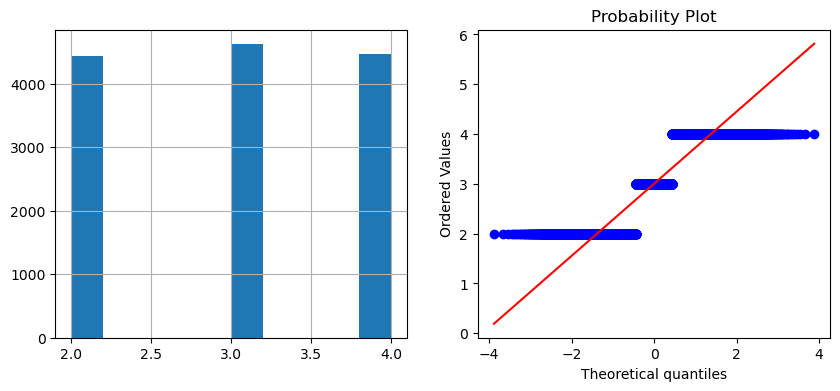

UCD2A


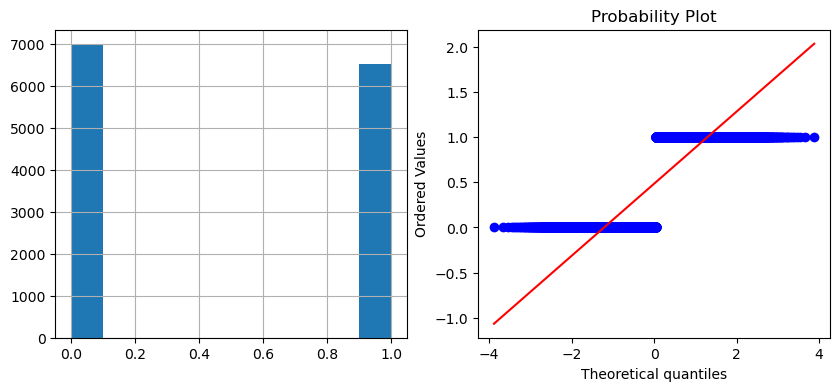

UCD2B


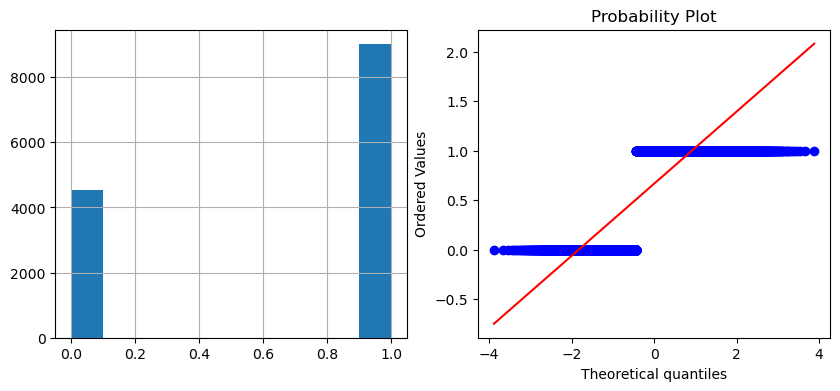

UCD2C


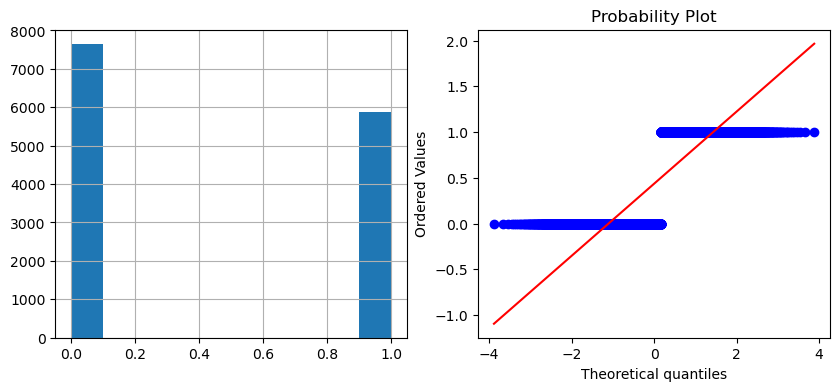

UCD2D


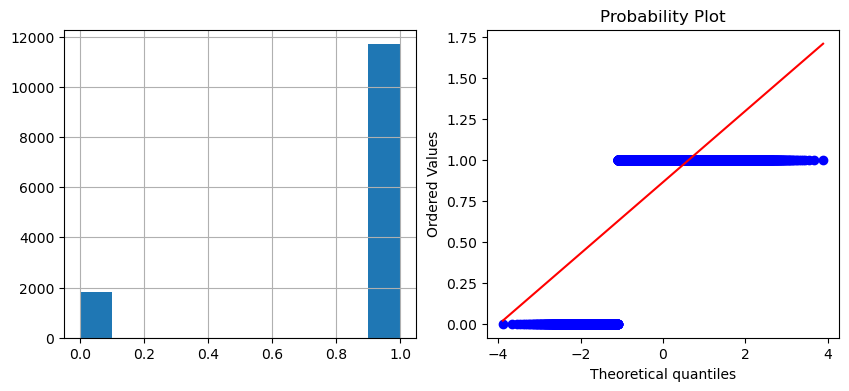

UCD2E


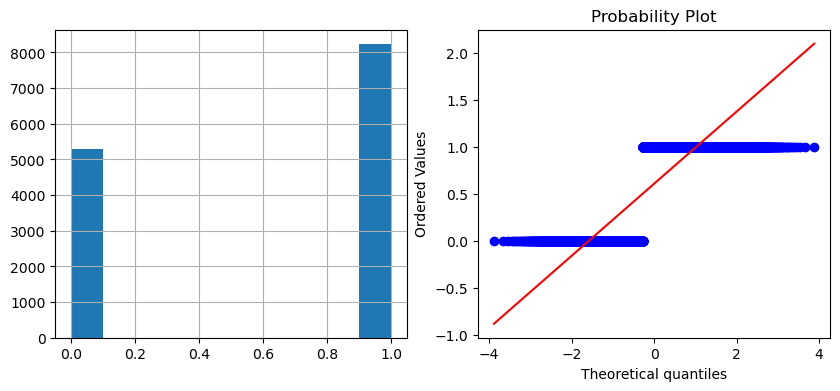

UCD2F


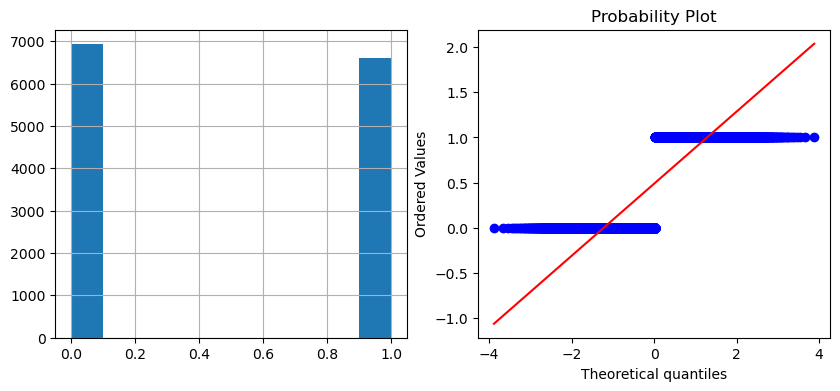

UCD2G


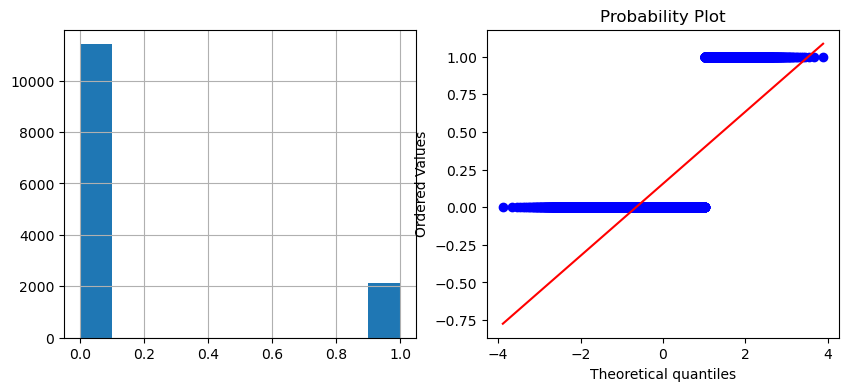

UCD2H


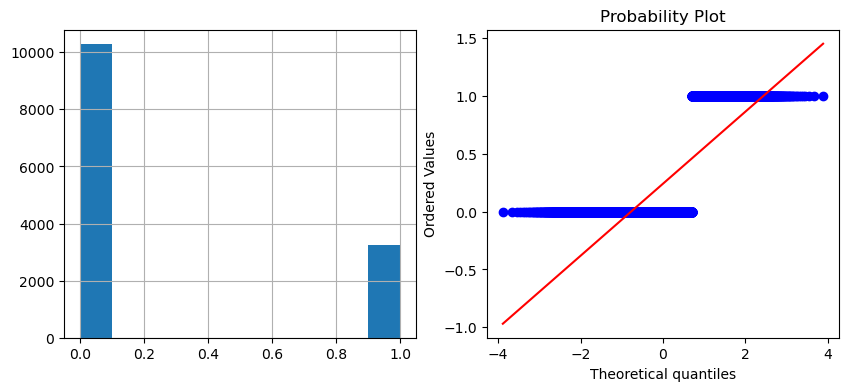

UCD2I


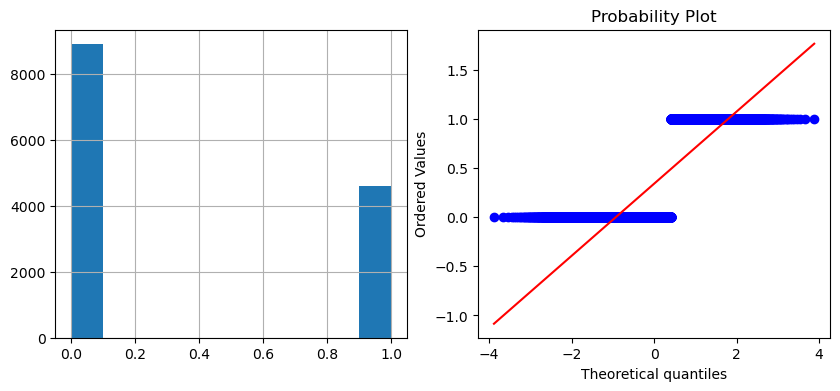

UCD2J


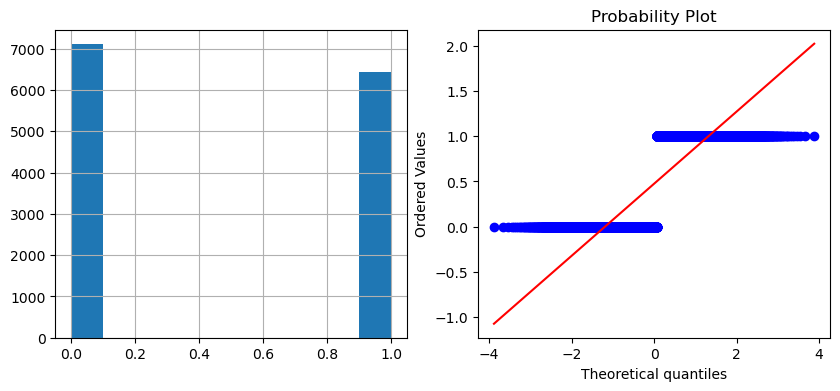

UCD2K


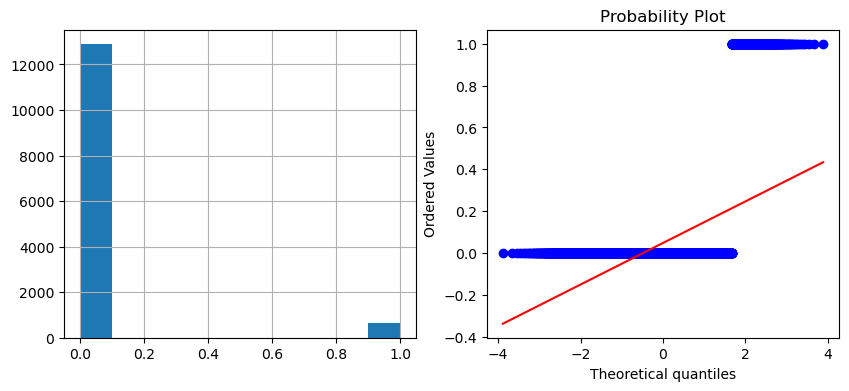

UCF17


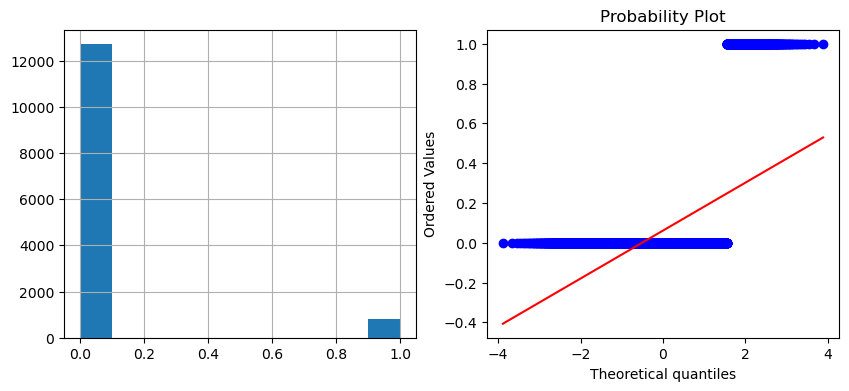

BD2


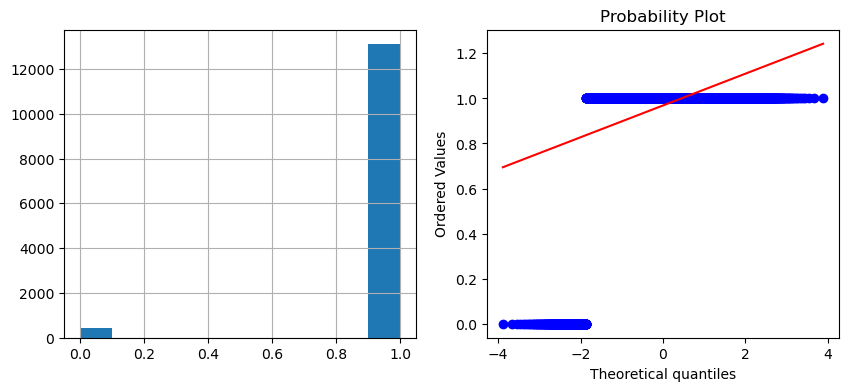

AN4


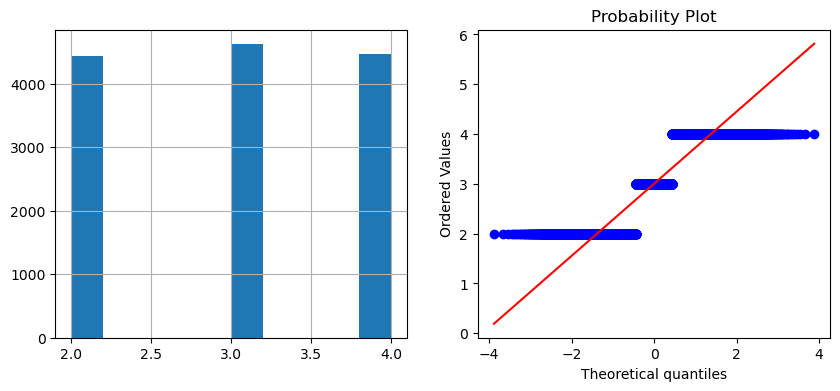

AN8


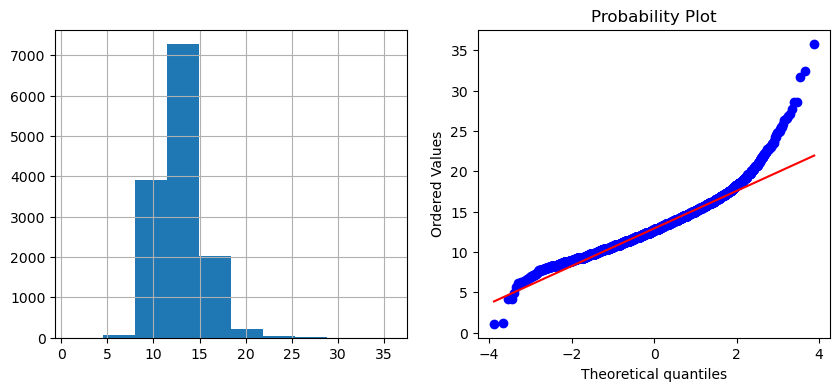

HH6


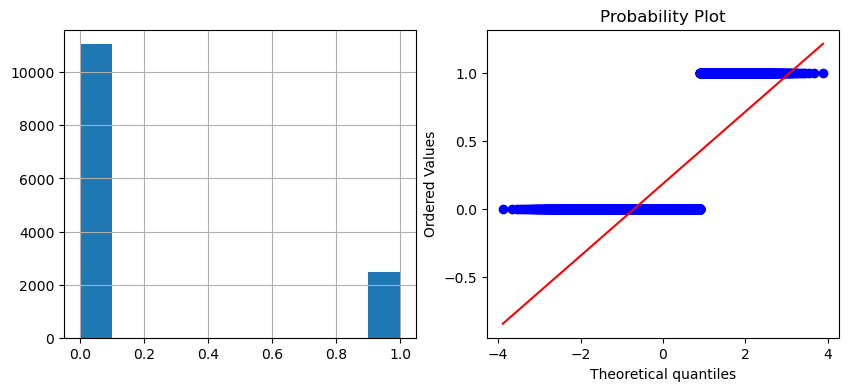

HH7


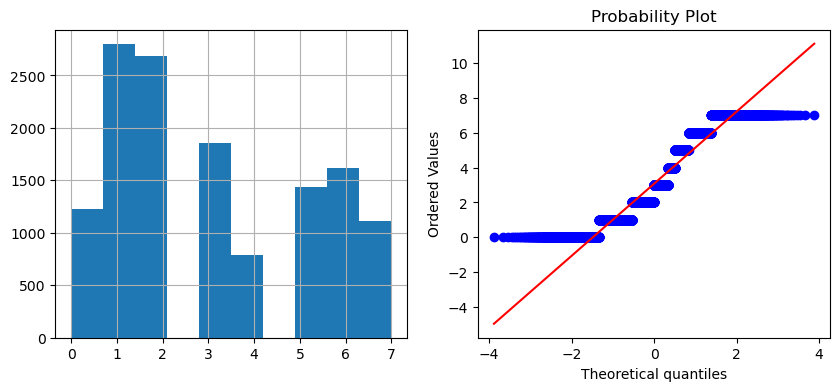

HL4


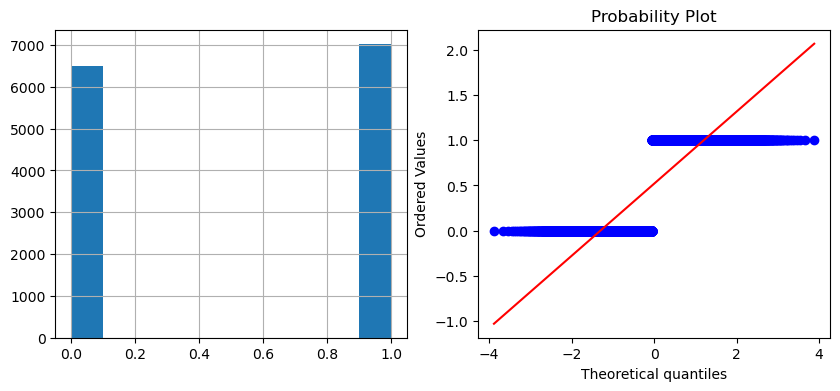

windex5


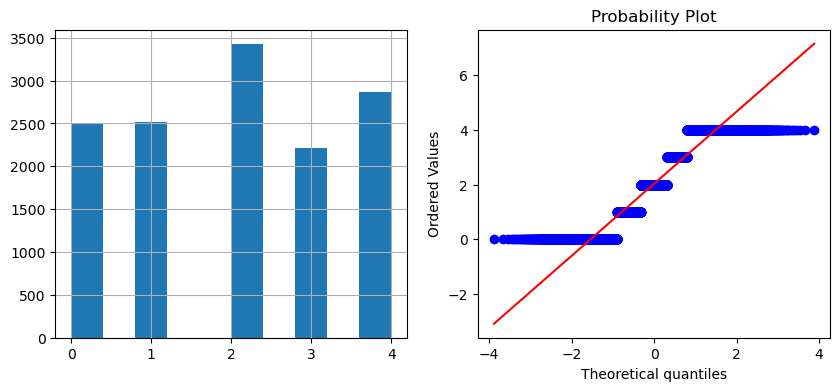

melevel


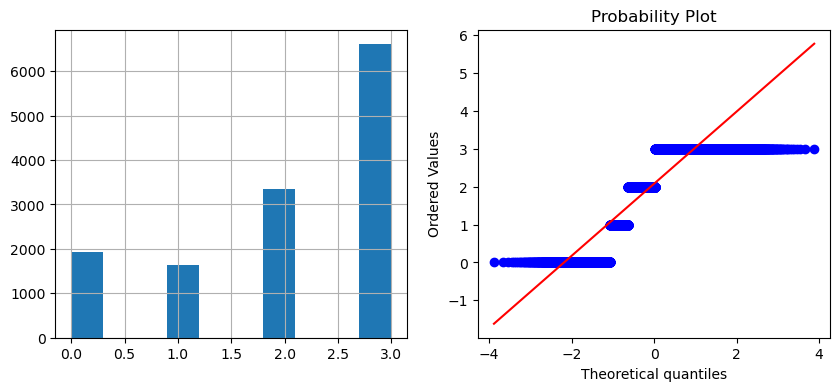

In [356]:
import scipy.stats as stat
import pylab 
def plot_data(df,feature):
    print(feature)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
for column in df_lebel.columns:
    plot_data(df_lebel,column)

In [357]:
#### Exponential Transdormation

"""
df_lebel['CDEAD']=df_lebel.CDEAD**(1/1.2)
plt.figure(figsize=(10,4))
plot_data(df_lebel,'CDEAD')
"""

"\ndf_lebel['CDEAD']=df_lebel.CDEAD**(1/1.2)\nplt.figure(figsize=(10,4))\nplot_data(df_lebel,'CDEAD')\n"

In [358]:
df_lebel.isnull().sum().sum()

0

### Feature Selection Using Correlation Remove

In [359]:
numeric_features = df_lebel.select_dtypes(include=[np.number])
numeric_features.columns

Index(['UB2', 'UCD2A', 'UCD2B', 'UCD2C', 'UCD2D', 'UCD2E', 'UCD2F', 'UCD2G',
       'UCD2H', 'UCD2I', 'UCD2J', 'UCD2K', 'UCF17', 'BD2', 'AN4', 'AN8', 'HH6',
       'HH7', 'HL4', 'windex5', 'melevel'],
      dtype='object')

In [360]:
#df_code= df_code.drop(['CDEAD','CSURV'],axis=1)
df_code.head()

,UB2,UCD2A,UCD2B,UCD2C,UCD2D,UCD2E,UCD2F,UCD2G,UCD2H,UCD2I,...,UCD2K,UCF17,BD2,AN4,AN8,HH6,HH7,HL4,windex5,melevel
0,4.0,NO,NO,NO,YES,NO,NO,NO,YES,NO,...,NO,0,YES,4.0,16.3,URBAN,Barishal,MALE,Richest,Higher secondary+
2,3.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,0,YES,3.0,9.8,URBAN,Barishal,FEMALE,Fourth,Primary
3,3.0,NO,YES,YES,YES,YES,NO,NO,NO,NO,...,NO,0,YES,3.0,14.7,URBAN,Barishal,MALE,Richest,Higher secondary+
4,4.0,YES,YES,NO,NO,NO,NO,NO,NO,NO,...,NO,0,YES,4.0,13.0,URBAN,Barishal,FEMALE,Richest,Higher secondary+
5,2.0,NO,YES,YES,YES,YES,NO,NO,NO,NO,...,NO,0,YES,2.0,11.7,URBAN,Barishal,FEMALE,Richest,Higher secondary+


In [361]:
co_matrix = numeric_features.corr()

def correlation(df1, threshold):
    threshold=abs(threshold)
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df_lebel, 0.9)
print('correlated features: ', len(set(corr_features)) )
corr_features

correlated features:  1


{'AN4'}

In [362]:
#co_matrix

###  ..............................................Feature Selection End...................................

In [363]:
df_lebel= df_lebel.drop(['AN4'],axis=1)

df_lebel.head()

,UB2,UCD2A,UCD2B,UCD2C,UCD2D,UCD2E,UCD2F,UCD2G,UCD2H,UCD2I,UCD2J,UCD2K,UCF17,BD2,AN8,HH6,HH7,HL4,windex5,melevel
0,4.0,0,0,0,1,0,0,0,1,0,0,0,0,1,16.3,1,0,1,3,0
2,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.8,1,0,0,0,2
3,3.0,0,1,1,1,1,0,0,0,0,0,0,0,1,14.7,1,0,1,3,0
4,4.0,1,1,0,0,0,0,0,0,0,0,0,0,1,13.0,1,0,0,3,0
5,2.0,0,1,1,1,1,0,0,0,0,0,0,0,1,11.7,1,0,0,3,0


### OneHot Encoding

In [364]:
cat_features1 = df_code.select_dtypes(exclude=[np.number])
#cat_features1=cat_features1.drop('UCF17',axis=1)
cat_features1.head()

,UCD2A,UCD2B,UCD2C,UCD2D,UCD2E,UCD2F,UCD2G,UCD2H,UCD2I,UCD2J,UCD2K,BD2,HH6,HH7,HL4,windex5,melevel
0,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,YES,URBAN,Barishal,MALE,Richest,Higher secondary+
2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,URBAN,Barishal,FEMALE,Fourth,Primary
3,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,YES,URBAN,Barishal,MALE,Richest,Higher secondary+
4,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,URBAN,Barishal,FEMALE,Richest,Higher secondary+
5,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,YES,URBAN,Barishal,FEMALE,Richest,Higher secondary+


In [365]:
num_features1= df_code.select_dtypes(include=[np.number])
num_features1=num_features1.drop('UCF17',axis=1)
num_features1.columns

Index(['UB2', 'AN4', 'AN8'], dtype='object')

In [366]:
df_code['UCF17'].dtype

dtype('int64')

In [367]:
df_oneHot = df_code.copy()
df_oneHot.head()

,UB2,UCD2A,UCD2B,UCD2C,UCD2D,UCD2E,UCD2F,UCD2G,UCD2H,UCD2I,...,UCD2K,UCF17,BD2,AN4,AN8,HH6,HH7,HL4,windex5,melevel
0,4.0,NO,NO,NO,YES,NO,NO,NO,YES,NO,...,NO,0,YES,4.0,16.3,URBAN,Barishal,MALE,Richest,Higher secondary+
2,3.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,0,YES,3.0,9.8,URBAN,Barishal,FEMALE,Fourth,Primary
3,3.0,NO,YES,YES,YES,YES,NO,NO,NO,NO,...,NO,0,YES,3.0,14.7,URBAN,Barishal,MALE,Richest,Higher secondary+
4,4.0,YES,YES,NO,NO,NO,NO,NO,NO,NO,...,NO,0,YES,4.0,13.0,URBAN,Barishal,FEMALE,Richest,Higher secondary+
5,2.0,NO,YES,YES,YES,YES,NO,NO,NO,NO,...,NO,0,YES,2.0,11.7,URBAN,Barishal,FEMALE,Richest,Higher secondary+


In [368]:
#OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
for col in cat_features1:
    df_oneHot = pd.get_dummies(df_oneHot, columns=[col], dtype=int)

df_oneHot.head(5)

,UB2,UCF17,AN4,AN8,UCD2A_NO,UCD2A_YES,UCD2B_NO,UCD2B_YES,UCD2C_NO,UCD2C_YES,...,HL4_MALE,windex5_Fourth,windex5_Middle,windex5_Poorest,windex5_Richest,windex5_Second,melevel_Higher secondary+,melevel_Pre-primary or none,melevel_Primary,melevel_Secondary
0,4.0,0,4.0,16.3,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,3.0,0,3.0,9.8,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,3.0,0,3.0,14.7,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,4.0,0,4.0,13.0,0,1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
5,2.0,0,2.0,11.7,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0


In [369]:
df_oneHot.shape

(13524, 49)

In [370]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

df_temp = df_oneHot.drop(num_features1.columns, axis=1)

scale = StandardScaler()
#scale = Normalizer()
#scale = MinMaxScaler()
scaledX = scale.fit_transform(num_features1)
scale_df = DataFrame(scaledX, columns = num_features1.columns)

df_oneHot_Scale = pd.concat([scale_df.reset_index(drop=True),df_temp.reset_index(drop=True)], axis=1)
df_oneHot_Scale.shape

(13524, 49)

In [371]:
df_oneHot_Scale['UCF17'].isnull().sum()

0

In [372]:
df_oneHot_Scale.to_csv('D:\\Academic\\Research\\ML_Python_Code_by_MRK\\MICS Data\Different domains prediction\\Children learning capacity\\lowbirth_oneHot.csv')

# ...............................Imbalance Handling......................................

In [373]:
df_load=df_oneHot_Scale.copy()

In [374]:
df_load.head()

,UB2,AN4,AN8,UCF17,UCD2A_NO,UCD2A_YES,UCD2B_NO,UCD2B_YES,UCD2C_NO,UCD2C_YES,...,HL4_MALE,windex5_Fourth,windex5_Middle,windex5_Poorest,windex5_Richest,windex5_Second,melevel_Higher secondary+,melevel_Pre-primary or none,melevel_Primary,melevel_Secondary
0,1.229106,1.229106,1.434072,0,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1,-0.003463,-0.003463,-1.308210,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.003463,-0.003463,0.759049,0,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
3,1.229106,1.229106,0.041836,0,0,1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,-1.236033,-1.236033,-0.506620,0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0


In [375]:
eda_percentage = df_load['UCF17'].value_counts(normalize = True).rename_axis('UCF17').reset_index(name = 'Percentage')
eda_percentage

,UCF17,Percentage
0,0,0.939145
1,1,0.060855


In [376]:
x=df_load.drop(['UCF17'], axis=1)
y=df_load['UCF17']

In [377]:
y

0        0
1        0
2        0
3        0
4        0
        ..
13519    0
13520    0
13521    0
13522    0
13523    0
Name: UCF17, Length: 13524, dtype: int64

In [378]:
from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler

In [453]:
oversampled = over_sampling.SMOTE(sampling_strategy=0.25, random_state=0, k_neighbors=5)
X_train_smote, y_train_smote = oversampled.fit_resample(x, y)

undersampled = RandomUnderSampler(sampling_strategy=0.25, random_state=0)
X_train_final, y_train_final = undersampled.fit_resample(X_train_smote, y_train_smote)

y_train_smote.value_counts()

UCF17
0    12701
1     3175
Name: count, dtype: int64

# Feature Extraction

In [454]:
x_train, x_test, y_train, y_test = train_test_split(X_train_final, y_train_final, test_size=0.25, random_state=42)

In [455]:
x_train.shape

(11906, 48)

In [456]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_PCA = pca.fit_transform(x_train)
x_test_PCA = pca.transform(x_test)

df_PCA_x_train = pd.DataFrame(data=x_train_PCA)

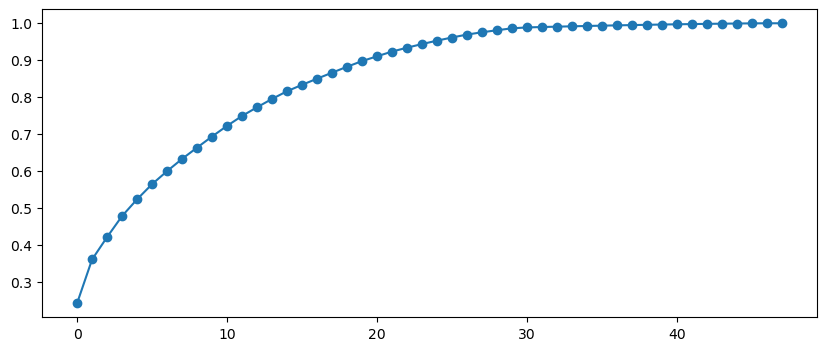

In [457]:
import numpy as np

plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:500]),marker = 'o')
plt.show()

In [458]:
np.cumsum(pca.explained_variance_ratio_[0:500])[30]

0.9887087346342383

In [459]:
#pca = PCA(n_components= 30)
pca = PCA()
pca.fit(x_train)
#PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
  
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

# Model fit

In [460]:
from sklearn.metrics import accuracy_score

In [461]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(max_depth=6)
dtmodel.fit(x_train_pca,y_train)
ypred = dtmodel.predict(x_test_pca)
print("Decision Tree Algorithm Classifier Accuracy Score:",dtmodel.score(x_test_pca,y_test),'%')

train_pred = dtmodel.predict(x_train_pca)
test_pred = dtmodel.predict(x_test_pca)

print('TRAIN ACCURACY:',accuracy_score(train_pred,y_train))
print('Test ACCURACY:',accuracy_score(test_pred,y_test))


Decision Tree Algorithm Classifier Accuracy Score: 0.9473418997228521 %
TRAIN ACCURACY: 0.9477574332269444
Test ACCURACY: 0.9473418997228521


In [462]:
from sklearn.ensemble import RandomForestClassifier

rnmodel = RandomForestClassifier(n_estimators=42, random_state=42)
rnmodel.fit(x_train_pca, y_train)

ypred = rnmodel.predict(x_test_pca)
print("Random Forest Algorithm Classifier Accuracy Score:",rnmodel.score(x_test_pca,y_test),'%')

train_pred = rnmodel.predict(x_train_pca)
test_pred = rnmodel.predict(x_test_pca)

print('TRAIN ACCURACY:',accuracy_score(train_pred,y_train))
print('Test ACCURACY:',accuracy_score(test_pred,y_test))

Random Forest Algorithm Classifier Accuracy Score: 0.9518770471151423 %
TRAIN ACCURACY: 0.9991600873509155
Test ACCURACY: 0.9518770471151423


In [463]:
from sklearn.metrics import accuracy_score, classification_report

report = classification_report(y_test, test_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3213
           1       0.98      0.76      0.86       756

    accuracy                           0.95      3969
   macro avg       0.96      0.88      0.91      3969
weighted avg       0.95      0.95      0.95      3969



In [464]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)
cm

array([[3202,   11],
       [ 180,  576]], dtype=int64)

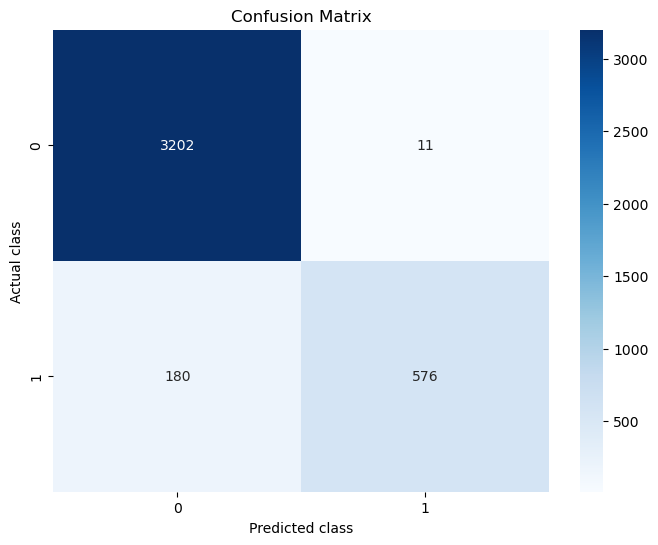

In [465]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion Matrix')
plt.show()

In [466]:
test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [467]:
y_test

9684     0
15016    1
5421     0
9843     0
15586    1
        ..
7652     0
9176     0
6853     0
3090     0
12976    1
Name: UCF17, Length: 3969, dtype: int64

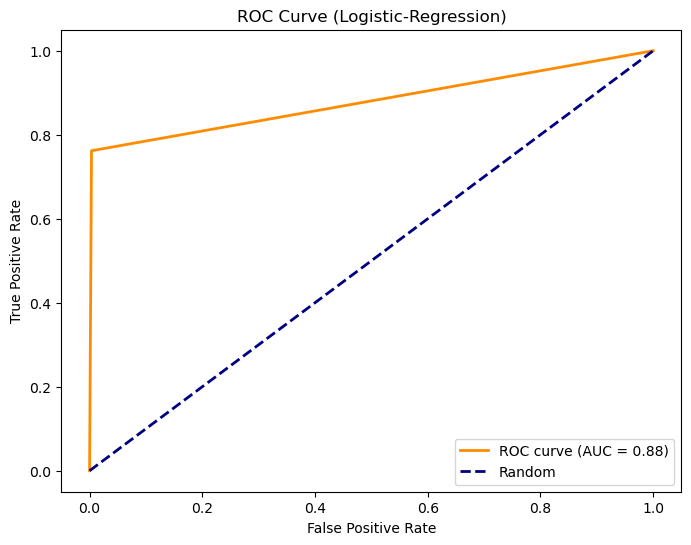

In [468]:
# Compute ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic-Regression)')
plt.legend(loc='lower right')
plt.show()